# NTDS'18 milestone 1: network collection and properties
[Effrosyni Simou](https://lts4.epfl.ch/simou), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: 3
* Students: Baptiste Hériard-Dubreuil, Jean-Baptiste Membrado, Guilhem Noiraud, Amaury Véron
* Dataset: Flight routes

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to three sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective 

The purpose of this milestone is to start getting acquainted to the network that you will use for this class. In the first part of the milestone you will import your data using [Pandas](http://pandas.pydata.org) and you will create the adjacency matrix using [Numpy](http://www.numpy.org). This part is project specific. In the second part you will have to compute some basic properties of your network. **For the computation of the properties you are only allowed to use the packages that have been imported in the cell below.** You are not allowed to use any graph-specific toolboxes for this milestone (such as networkx and PyGSP). Furthermore, the aim is not to blindly compute the network properties, but to also start to think about what kind of network you will be working with this semester. 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Import your data and manipulate them. 

###  A. Load your data in a Panda dataframe.

First, you should define and understand what are your nodes, what features you have and what are your labels. Please provide below a Panda dataframe where each row corresponds to a node with its features and labels. For example, in the the case of the Free Music Archive (FMA) Project, each row of the dataframe would be of the following form:


| Track   |  Feature 1  | Feature 2 | . . . | Feature 518|  Label 1 |  Label 2 |. . .|Label 16|
|:-------:|:-----------:|:---------:|:-----:|:----------:|:--------:|:--------:|:---:|:------:|
|         |             |           |       |            |          |          |     |        |

It is possible that in some of the projects either the features or the labels are not available. This is OK, in that case just make sure that you create a dataframe where each of the rows corresponds to a node and its associated features or labels.

In [19]:
# the pandas dataframe with the features and labels
features = pd.read_csv("routes.dat", names = ["airline",
                                              "airline_id",
                                              "source_airport",
                                              "source_airport_id",
                                              "destination_airport",
                                              "destination_airport_id",
                                              "codeshare",
                                              "stops",
                                              "equipment"])
features.head(10)

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
5,2B,410,DME,4029,KZN,2990,NaN,0,CR2
6,2B,410,DME,4029,NBC,6969,NaN,0,CR2
7,2B,410,DME,4029,TGK,\N,NaN,0,CR2
8,2B,410,DME,4029,UUA,6160,NaN,0,CR2
9,2B,410,EGO,6156,KGD,2952,NaN,0,CR2


### B. Create the adjacency matrix of your network.

Remember that there are edges connecting the attributed nodes that you organized in the dataframe above. The connectivity of the network is captured by the adjacency matrix $W$. If $N$ is the number of nodes, the adjacency matrix is an $N \times N$ matrix where the value of $W(i,j)$ is the weight of the edge connecting node $i$ to node $j$.  

There are two possible scenarios for your adjacency matrix construction, as you already learned in the tutorial by Benjamin:

1) The edges are given to you explicitly. In this case you should simply load the file containing the edge information and parse it in order to create your adjacency matrix. See how to do that in the  [graph from edge list]() demo.

2) The edges are not given to you. In that case you will have to create a feature graph. In order to do that you will have to chose a distance that will quantify how similar two nodes are based on the values in their corresponding feature vectors. In the [graph from features]() demo Benjamin showed you how to build feature graphs when using Euclidean distances between feature vectors. Be curious and explore other distances as well! For instance, in the case of high-dimensional feature vectors, you might want to consider using the cosine distance. Once you compute the distances between your nodes you will have a fully connected network. Do not forget to sparsify by keeping the most important edges in your network.

Follow the appropriate steps for the construction of the adjacency matrix of your network and provide it in the Numpy array ``adjacency`` below: 

In [20]:
source_airports = features[["source_airport_id", "source_airport"]]
source_airports.columns = ["airport_id", "airport"]

destination_airports =  features[["destination_airport_id", "destination_airport"]]
destination_airports.columns = ["airport_id", "airport"]

nodes = pd.concat([source_airports,destination_airports], axis = 0).drop_duplicates()
nodes.replace(to_replace='\\N', value=np.NaN, inplace=True)
nodes.dropna(axis=0, inplace=True)

edges = features[["source_airport_id", "destination_airport_id"]]
edges = edges.replace(to_replace='\\N', value=np.NaN)
edges = edges.dropna(axis=0)

nodes.head()

,airport_id,airport
0,2965,AER
1,2966,ASF
3,2968,CEK
5,4029,DME
9,6156,EGO


In [21]:
edges.head()

,source_airport_id,destination_airport_id
0,2965,2990
1,2966,2990
2,2966,2962
3,2968,2990
4,2968,4078


In [22]:
# Create a conversion table from airport_id to node index.

airport_id2idx = pd.DataFrame(nodes.airport_id.unique())
airport_id2idx.reset_index(level = 0, inplace = True)
airport_id2idx.columns = ["node_idx", "airport_id"]
airport_id2idx.set_index("airport_id", inplace = True)
airport_id2idx.head()

,node_idx
airport_id,
2965,0
2966,1
2968,2
4029,3
6156,4


In [23]:
airport_id2idx.to_csv("airport_id2idx.csv")

In [24]:
edges = pd.merge(edges, airport_id2idx,
                 left_on = "source_airport_id",
                 right_index = True,
                 sort = False)

In [25]:
edges.head()

,source_airport_id,destination_airport_id,node_idx
0,2965,2990,0
2816,2965,2979,0
3867,2965,1735,0
13786,2965,2954,0
31979,2965,2983,0


In [26]:
edges = pd.merge(edges, airport_id2idx,
                 left_on = "destination_airport_id",
                 right_index = True,
                 sort = False,
                 suffixes = ("_source", "_destination"))

edges = edges.drop_duplicates()  # Avoid multilinks

In [27]:
edges.head()

,source_airport_id,destination_airport_id,node_idx_source,node_idx_destination
0,2965,2990,0,7
1,2966,2990,1,7
3,2968,2990,2,7
5,4029,2990,3,7
10,6156,2990,4,7


In [28]:
n_nodes = np.size(nodes["airport_id"])
adjacency_initial = np.zeros((n_nodes, n_nodes), dtype = int)
n_nodes

3333

In [29]:
for idx, row in edges.iterrows():
    i, j = int(row.node_idx_source), int(row.node_idx_destination)
    adjacency_initial[i, j] = 1

In [30]:
adjacency_initial[:15, :15]

array([[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]])

In [31]:
adjacency_initial.shape

(3333, 3333)

## Part 2

Execute the cell below to plot the (weighted) adjacency matrix of your network.

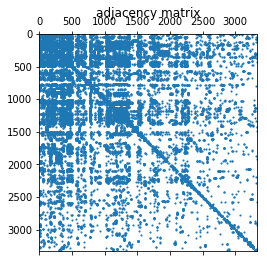

In [32]:
plt.spy(adjacency_initial, markersize=1)
plt.title('adjacency matrix');

### Question 1

What is the maximum number of links $L_{max}$ in a network with $N$ nodes (where $N$ is the number of nodes in your network)? How many links $L$ are there in your collected network? Comment on the sparsity of your network.

In [33]:
# Each row in the dataset is a link
n_links = edges.shape[0]
n_links

37274

**There are 37505 links in the collected network. The maximum number of links in a network with N nodes is $N(N-1)$ (as this network is a directed network). In our case, for $N=3425$, we have $L_{max}=11727200$. This network is sparse : less than $0.32\%$ of the possible links are filled.**

### Question 2

Is your graph directed or undirected? If it is directed, convert it to an undirected graph by symmetrizing the adjacency matrix.

**It is directed as a journey between two airports is not necessarily done in both ways.**

In [34]:
# First we test if the graph is directed or not

# We use the numpy function allclose that tests if two arrays are element-wise equal to each other
# To test if the adjacency matrix is symmetric, we test if the matrix and its transposed are equal
# If they are equal, then the graph is undirected, and we set the directed boolean to False

directed = not(np.allclose(adjacency_initial, adjacency_initial.T))

print('directed = ' +str(directed))

# If the underlying graph is directed, then we create another array storing 
# the symmetrized version of the adjacency matrix
# We keep the non-symmetric adjacency matrix under the matrix adjacency_initial

adjacency_undirected = adjacency_initial
if directed:
    for i in range(n_nodes):
        for j in range(n_nodes):
            if adjacency_initial[j][i] > 0:
                adjacency_undirected[i][j] = adjacency_initial[j][i]

directed = True


### Question 3

In the cell below save the features dataframe and the **symmetrized** adjacency matrix. You can use the Pandas ``to_csv`` to save the ``features`` and Numpy's ``save`` to save the ``adjacency``. We will reuse those in the following milestones.

In [35]:
adjacency = adjacency_undirected

In [36]:
df_adjacency = pd.DataFrame(adjacency)

In [37]:
airport_id2idx.reset_index(inplace=True)

In [38]:
airport_id2idx.head()

,airport_id,node_idx
0,2965,0
1,2966,1
2,2968,2
3,4029,3
4,6156,4


In [39]:
df_adjacency.columns = airport_id2idx.airport_id
df_adjacency.set_index(airport_id2idx.airport_id, inplace=True)

In [40]:
df_adjacency.head()

airport_id,2965,2966,2968,4029,6156,2922,2952,2990,2948,2962,...,9758,4336,1040,2697,1463,8259,7370,6372,4125,7369
airport_id,,,,,,,,,,,,,,,,,,,,,
2965,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2966,0,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2968,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4029,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6156,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
features.to_csv("./features")

In [42]:
df_adjacency.to_csv("df_adjacency.csv")

In [43]:
np.save("./adjacency", adjacency)

### Question 4

Are the edges of your graph weighted?

**No, since it just represents the existence of a path with a 0 or a 1. We do not consider the stops as weights at the moment.**

### Question 5

What is the degree distibution of your network? 

**Since the degree distribution is linear in a log scaled graph, we have $p_{k}\sim k^{-\gamma}$ with $\gamma=1.6$. This $\gamma$ is very low ($\gamma < 2$). This can only be explained as we have a finite network of small size ($N\sim 10^{3}$).**

In [44]:
degree = np.zeros(n_nodes)

for i in range(n_nodes):
    degree[i] = sum(adjacency_undirected[i])
    
assert len(degree) == n_nodes

Execute the cell below to see the histogram of the degree distribution.

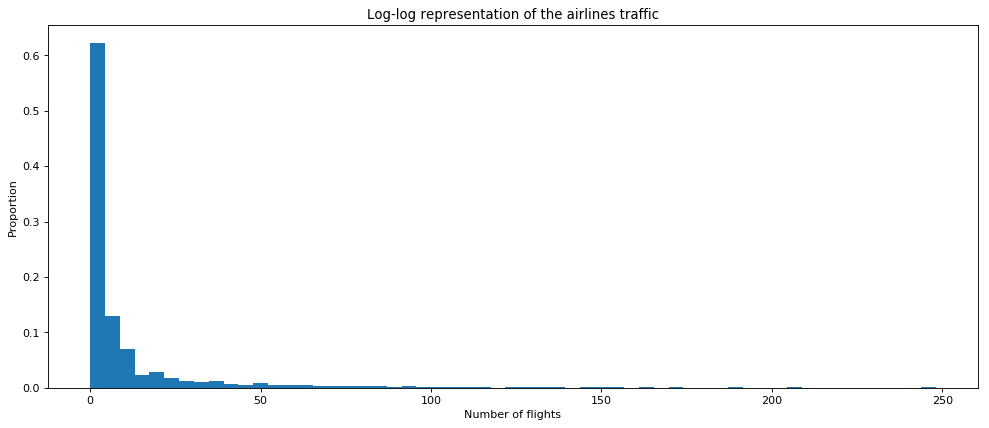

In [45]:
weights = np.ones_like(degree) / float(n_nodes)

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Log-log representation of the airlines traffic')
plt.ylabel('Proportion');
plt.xlabel('Number of flights');
plt.hist(degree, weights=weights, bins = int(np.sqrt(n_nodes)));

array([-1.59209779,  7.58711237])

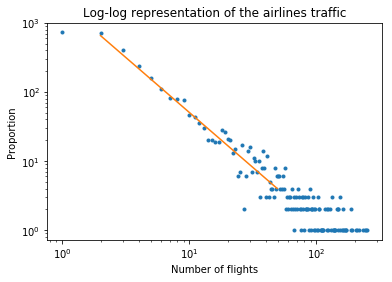

In [46]:
# Here we compute the parameters of the power law representing our distribution
degrees_unique, degrees_freq = np.unique(degree, return_counts=True)

idx_log = [k for k in range(len(degrees_unique)) if (degrees_unique[k] > 1
                                                     and degrees_unique[k] < 50    #Avoid border effects
                                                     and degrees_freq[k] > 0) ]
# Linear regression
p = np.polyfit(np.log(degrees_unique[idx_log]), np.log(degrees_freq[idx_log]), 1)

plt.plot(degrees_unique, degrees_freq, '.')
plt.plot(degrees_unique[idx_log], np.exp(p[0]*np.log(degrees_unique[idx_log]) + p[1]))
plt.xscale('log')
plt.yscale('log')
plt.title('Log-log representation of the airlines traffic')
plt.ylabel('Proportion');
plt.xlabel('Number of flights');

p #Parameters of the power law, gamma is the first coefficient.

What is the average degree?

**The average degree is 11.45**

In [47]:
avg_degree = np.mean(degree)
round(avg_degree, 2)

11.45

### Question 6

Comment on the degree distribution of your network.

**Most airports are linked to a few others. There a few hubs with many connections, more than 150.**

**We are in a connected regime since we have $\langle k \rangle > ln(N)$.**

**Our network is a scale-free network since it follows a power law distribution, as shown in question 5.**

### Question 7

Write a function that takes as input the adjacency matrix of a graph and determines whether the graph is connected or not.

In [48]:
#Function that returns new nodes linked to current_node and their hop-distance to origin.

def link_nodes_unlabelled(adjacency, current_node, distance_from_start_node):
    link_nodes = []
    for idx in range(adjacency.shape[0]):
        if adjacency[current_node[0],idx] > 0 and distance_from_start_node[idx] == np.Inf:
            link_nodes.append((idx, current_node[1]+1))     # Add unlabelled nodes linked to the current node with label +1
    return link_nodes

In [49]:
#Breadth first search algorithm

#Remark : the BFS compute the shortest path for the hop-distance

def bfs(adjacency, start_node):
    distance_from_start_node = np.Inf * np.ones(adjacency.shape[0])   # Unlabelled are set to inf
    distance_from_start_node[start_node] = 0
    queue = [(start_node, 0)]
    
    while queue:
        current_node = queue.pop(0)
        link_nodes = link_nodes_unlabelled(adjacency, current_node, distance_from_start_node)
        for node in link_nodes:
            distance_from_start_node[node[0]] = node[1]
        queue += link_nodes
    
    return distance_from_start_node

In [50]:
def connected_graph(adjacency):
    """Determines whether a graph is connected.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    bool
        True if the graph is connected, False otherwise.
    """
    
    n_nodes = adjacency.shape[0]
    start_node = int(np.random.rand() * n_nodes)
    distance_from_start_node = bfs(adjacency, start_node)                   # Compute BFS
    
    connected = not(sum(np.array(distance_from_start_node) == np.Inf) > 0)  # Count if there is any unlabelled node
    
    return connected

Is your graph connected? Run the ``connected_graph`` function to determine your answer.

In [51]:
connected_graph(adjacency_undirected)

False

**The graph is not connected.**

### Question 8

Write a function that extracts the connected components of a graph.

In [62]:
def find_components(adjacency):
    """Find the connected components of a graph.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    
    Returns
    -------
    list of numpy arrays
        A list of adjacency matrices, one per connected component.
    """
    
    components = []
    n_nodes = adjacency.shape[0]
    n = 1
    unseen_nodes = [i for i in range(n_nodes)]
    a=[]
    while unseen_nodes:
        connected_components = []
        current_node = np.random.choice(unseen_nodes)   # Choose a random unseen node
        distance_from_start_node = bfs(adjacency, current_node)  # Compute BFS from this node
        
        for idx, dist in enumerate(distance_from_start_node):
            if dist != np.Inf:     # The connected nodes (from a source) are the labelled nodes !
                connected_components.append(idx)
        
        unseen_nodes = [e for e in unseen_nodes if e not in connected_components] # Update unseen nodes
        if len(connected_components) > 1: #don't take links with a NaN
            components.append(adjacency[connected_components, :][:, connected_components]) # Add adjacency of the component
        a.append(connected_components)
    return a

How many connected components is your network composed of? What is the size of the largest connected component? Run the ``find_components`` function to determine your answer. 

In [68]:
connected_components = find_components(adjacency_undirected)[0]

In [85]:
biggest_cluster = adjacency[connected_components, :][:, connected_components]

In [86]:
biggest_cluster.shape

(3304, 3304)

In [92]:
airport_id2idx.head()

,airport_id,node_idx
0,2965,0
1,2966,1
2,2968,2
3,4029,3
4,6156,4


In [94]:
airport_id2idx = airport_id2idx.iloc[connected_components]

In [102]:
df_biggest_cluster = pd.DataFrame(biggest_cluster)

In [103]:
df_biggest_cluster.columns = airport_id2idx.airport_id
df_biggest_cluster.set_index(airport_id2idx.airport_id, inplace=True)

In [105]:
df_biggest_cluster.shape

(3304, 3304)

In [109]:
np.save("./biggest_cluster", biggest_cluster)
df_biggest_cluster.to_csv("df_biggest_cluster.csv")

In [55]:
len(components) #Number of components

7

In [56]:
#Size of each connected component
size_components = []
for conn_comp in components:
    size_components.append(conn_comp.shape[0])

In [57]:
max(size_components) #Size of the largest component

3304

**There are 7 connected components in the network.**

**The size of the largest connected component is 3308 (out of 3425 airports).**

### Question 9

Write a function that takes as input the adjacency matrix and a node (`source`) and returns the length of the shortest path between that node and all nodes in the graph using Dijkstra's algorithm. **For the purposes of this assignment we are interested in the hop distance between nodes, not in the sum of weights. **

Hint: You might want to mask the adjacency matrix in the function ``compute_shortest_path_lengths`` in order to make sure you obtain a binary adjacency matrix. 

In [ ]:
def compute_shortest_path_lengths(adjacency, source):
    """Computes the shortest path length between a source node and all nodes.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    
    Returns
    -------
    list of ints
        The length of the shortest path from source to all nodes. Returned list should be of length n_nodes.
    """

    queue = [source]
    distances = np.full(len(adjacency[0]), np.Inf)
    parents = np.full(len(adjacency[0]), None)
    distances[source] = 0
    parents[source] = source
    while len(queue) > 0:
        elem = queue.pop(0)
        for i in range(len(adjacency[elem])):
            weight = adjacency[elem,i]   # Find the weight
            new_dist = weight + distances[elem] # Update all the weight ith this one
            if (weight > 0):  # If there was a connection
                if (distances[i] == np.Inf): # If it is unlabelled yet
                    queue += [i]
                    distances[i] = new_dist
                    parents[i] = elem
                elif (distances[i] > new_dist): # If we found a better path
                    distances[i] = new_dist
                    parents[i] = elem
    return distances.tolist()

#print(compute_shortest_path_lengths(adjacency_undirected,0))

**We don't need to mask the adjacency matrix since it is already unweighted.**

### Question 10

The diameter of the graph is the length of the longest shortest path between any pair of nodes. Use the above developed function to compute the diameter of the graph (or the diameter of the largest connected component of the graph if the graph is not connected). If your graph (or largest connected component) is very large, computing the diameter will take very long. In that case downsample your graph so that it has 1.000 nodes. There are many ways to reduce the size of a graph. For the purposes of this milestone you can chose to randomly select 1.000 nodes. 

**Since our graph has no weights, Dijkstra and BFS algorithms are equivalent. 
BFS~O(M) with M the number of edges and Dijkstra~O(NxN) with N the number of nodes.
For computational reasons (our adjacency matrix is sparse), we have chosen to use BFS instead of Dijkstra.**

In [ ]:
#First we find the biggest cluster in our network, also needed in question 14
index_biggest = np.argmax(size_components)
biggest_cluster, size_biggest = components[index_biggest], size_components[index_biggest]

def longest_shortest_path(adjacency):
    """
    Computes the maximum distance between two nodes in the graph
    
    Parameters
    ----------
    adjacency : numpy array
        the adjacency matrix representing the graph
    
    Returns
    -------
    longest_shortest_path : int
        the length of the shortest path between two nodes that are distant at the maximum distance
        in the graph
    
    """
    
    
    max_foreach_node = []
    size = len(adjacency[0])
    print(size)
    for node_idx in range(size):   # For all nodes
        print(node_idx)
        shortest_path_lengths = bfs(adjacency, node_idx).tolist()  # Compute bfs
        max_foreach_node.append(max(shortest_path_lengths))  # Keep the longest distance from this node to all others
    
    longest_shortest_path = max(max_foreach_node) # Find the longest distance among the previouses
    return longest_shortest_path

#Uncomment to run the cell. Warning: it lasts between 3 and 4 hours. 
#print(longest_shortest_path(biggest_cluster))

#Final result
print(13.0)

**The longest shortest path between any pair of nodes in the graph is of length 13.**

### Question 11

Write a function that takes as input the adjacency matrix, a path length, and two nodes (`source` and `target`), and returns the number of paths of the given length between them.

**11.1 : Find the number of paths of a given length between two nodes, with edge and node repetition allowed.**

In [ ]:
def compute_paths_with_repetitions(adjacency, source, target, length):
    paths = np.zeros(np.shape(adjacency)[0])
    paths[source] = 1
    
    for l in range(length):
        paths = adjacency.dot(paths)   # Apply connectedness to previous connected nodes and sum it for all nodes
    
    return int(paths[target])

In [ ]:
print(compute_paths_with_repetitions(adjacency_undirected, 0, 10, 1))
print(compute_paths_with_repetitions(adjacency_undirected, 6, 7, 2))
print(compute_paths_with_repetitions(adjacency_undirected, 0, 10, 3))
print(compute_paths_with_repetitions(adjacency_undirected, 15, 93, 4))
print(compute_paths_with_repetitions(adjacency_undirected, 21, 72, 8))

**11.2 : Find the number of paths of a given length between two nodes, with edge and node repetitions  NOT allowed.**

In [ ]:
import itertools as it

In [ ]:
def compute_paths(adjacency, source, target, length):
    """Compute the number of paths of a given length between a source and target node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    source: int
        The source node. A number between 0 and n_nodes-1.
    target: int
        The target node. A number between 0 and n_nodes-1.
    length: int
        The path length to be considered.
    
    Returns
    -------
    int
        The number of paths.
    """
    
    if length == 1:
        n_paths = adjacency[source, target]
    else:    
        n_paths = 0

        inter_nodes = list(range(n_nodes))
        inter_nodes.remove(source)
        inter_nodes.remove(target)    # keep only intermediary nodes

        all_paths = list(it.permutations(inter_nodes, length - 1))    # -1 because we have already the first and last node

        for path in all_paths:
            exists_path = adjacency[source, path[0]]   # evaluation of first link in path

            for idx in range(len(path) - 1):   # evaluation of intermediary links
                exists_path *= adjacency[path[idx], path[idx+1]]

            exists_path *= adjacency[target, path[-1]]   # evaluation of last link in path

            n_paths += exists_path 
    
    return n_paths

Test your function on 5 pairs of nodes, with different lengths.

In [ ]:
print(compute_paths(adjacency_undirected, 0, 10, 1))
print(compute_paths(adjacency_undirected, 6, 7, 2))
print(compute_paths(adjacency_undirected, 0, 10, 3))
print(compute_paths(adjacency_undirected, 23, 67, 2))

### Question 12

How many paths of length 3 are there in your graph? Hint: calling the `compute_paths` function on every pair of node is not an efficient way to do it.

**12.1 Compute the number of paths of length 3 allowing repetitions of edges and nodes.**

In [ ]:
def compute_number_of_paths_with_repetition(adjacency, length):
    """
    Computes the number of paths of a certain length with repetitions allowed
    
    Parameters
    ----------
    adjacency : numpy array
        the adjacency matrix representing the graph
    length : int
        the length of the paths we count
        
    Returns
    -------
    the number of paths of length 'length' in the graph : int
    """
    
    paths = np.ones(np.shape(adjacency)[0])
    
    for l in range(length):
        paths = adjacency.dot(paths)   # Sum the elements of the adjacency matrix to the power length
    
    return int(sum(paths))

In [ ]:
compute_number_of_paths_with_repetition(adjacency_undirected, 3)

**12.1 Compute the number of paths of length 3 forbidding repetitions of edges and nodes.**

In [ ]:
def limited_bfs(adjacency, start_node, distance):

    """
    This function is used to compute all the nodes at a certain distance to node start_node.
    We call this function on every node of the graph to count how many paths of length 3 are there in the graph.
    
    Parameters
    ----------
    adjacency : numpy array
        the adjacency matrix of the graph
    start_node : int
        the node on which we want to compute the algorithm on
    distance : int
        the length of the paths we want to count
        
    Returns
    -------
    nodes_at_distance : int
        the number of nodes of which there is a path of length 'distance'
        between start_node and those nodes
    """
    
    distance_from_start_node = np.Inf*np.ones(adjacency.shape[0])
    distance_from_start_node[start_node] = 0
    queue = [(start_node, 0)]
    
    nodes_at_distance = []
    
    while queue:
        current_node = queue.pop(0)
        # This test allows us to immediately remove all nodes that are up to 
        if(current_node[1] > distance):
            continue
            
        if(current_node[1] == distance): # If we found a path of the right distance
            nodes_at_distance.append(current_node[0])
        
        link_nodes = link_nodes_unlabelled(adjacency, current_node, distance_from_start_node)
        for node in link_nodes:
            distance_from_start_node[node[0]] = node[1]

        queue += link_nodes
    
    return nodes_at_distance

In [ ]:
# Idea : calling a bfs algorithm on every node and counting how many nodes are at distance 3 to this node
# Not computed here since it is very long to compute.

# distance = 3
# total_number = 0
# N = adjacency_undirected.shape[0]
# 
# for i in range(N):
#     total_number = total_number + len(limited_bfs(adjacency_undirected, i, distance))
# 
# print(total_number)

### Question 13

Write a function that takes as input the adjacency matrix of your graph (or of the largest connected component of your graph) and a node and returns the clustering coefficient of that node. 

In [ ]:
def compute_clustering_coefficient(adjacency, node):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """
    
    neighbour = limited_bfs(adjacency,node,1) # Compute the neighbours of node
    k = len(neighbour)
    if k == 0 or k == 1:
        return 0
    else:
        L=0
        for i in neighbour:
            for j in neighbour:
                if adjacency[i, j] > 0:  # For each connected neighbour, add its weight
                    L += adjacency[i, j]
        clustering_coeff = L/(k*(k-1)) # not 2L because each edge is alrealy counted two times
    return clustering_coeff

### Question 14

What is the average clustering coefficient of your graph (or of the largest connected component of your graph if your graph is disconnected)? Use the function ``compute_clustering_coefficient`` to determine your answer.

In [ ]:
#Then we compute the different cluster coefficients and the average.
C_coeffs = [compute_clustering_coefficient(biggest_cluster, i) for i in range(size_biggest)]
C_average = sum(C_coeffs)/size_biggest

In [ ]:
print(round(C_average, 3))

**The average cluster coefficient is 0,498.**